??? initial picks

??? swap per week allowed

no duplicates allowed

based off total returns

from opening price of day 1 -> ???



plot overall portfolios

show returns of each stock in each portfolio

In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from datetime import date

In [9]:
START_DATE = '2020-01-01'
END_DATE = date.today()

In [10]:
#use this or next kernal
JIM_INIT_STOCK1 = input('jim stock1: ')
ANDY_INIT_STOCK1= input('andy stock1: ')
JIM_INIT_STOCK2 = input('jim stock2: ')
ANDY_INIT_STOCK2= input('andy stock2: ')
JIM_INIT_STOCK3 = input('jim stock3: ')
ANDY_INIT_STOCK3= input('andy stock3: ')

jim stock1: t
andy stock1: tsla
jim stock2: penn
andy stock2: ba
jim stock3: aapl
andy stock3: uso


#use this or previous kernal
JIM_INIT_STOCK1= 'AMZN'
JIM_INIT_STOCK2= 'PENN'
JIM_INIT_STOCK3= 'NFLX'

ANDY_INIT_STOCK1= 'MSFT'
ANDY_INIT_STOCK2= 'GOOG'
ANDY_INIT_STOCK3= 'TSLA'

In [11]:
group_stocks = []
names = ['jim','andy']

jim_stocks = []
jim_stocks.append(JIM_INIT_STOCK1)
jim_stocks.append(JIM_INIT_STOCK2)
jim_stocks.append(JIM_INIT_STOCK3)

andy_stocks = []
andy_stocks.append(ANDY_INIT_STOCK1)
andy_stocks.append(ANDY_INIT_STOCK2)
andy_stocks.append(ANDY_INIT_STOCK3)

group_stocks.append(jim_stocks)
group_stocks.append(andy_stocks)
group_stocks, names

([['t', 'penn', 'aapl'], ['tsla', 'ba', 'uso']], ['jim', 'andy'])

In [12]:
stock_prices = pd.DataFrame()
today = date.today()
for investor in group_stocks:
    for stock in investor:
        stock_prices[stock] = wb.DataReader(stock,data_source = 'yahoo', start = START_DATE,end = END_DATE)['Adj Close']

stock_prices.head()

,t,penn,aapl,tsla,ba,uso
Date,,,,,,
2020-01-02,37.683826,26.139999,298.829956,430.260010,331.348572,102.480003
2020-01-03,37.877773,25.930000,295.924713,443.010010,330.791901,105.440002
2020-01-06,37.916561,26.209999,298.282715,451.540009,331.766083,105.279999
2020-01-07,38.062023,26.459999,296.879883,469.059998,335.285156,105.040001
2020-01-08,38.178391,26.850000,301.655548,492.140015,329.410095,101.279999


In [13]:
#show daily returns
stock_returns = stock_prices.pct_change()
stock_returns =stock_returns[1:]*100

#portfolio returns
stock_returns['Jim_Returns_%']= round(stock_returns.iloc[:,0:3].mean(axis=1),2)
stock_returns['Andy_Returns_%']= round(stock_returns.iloc[:,3:6].mean(axis=1),2)

stock_returns

#plt.plot(jim_stock_returns['Portfolio_Returns_%'])
#plt.show()

,t,penn,aapl,tsla,ba,uso,Jim_Returns_%,Andy_Returns_%
Date,,,,,,,,
2020-01-03,0.514669,-0.803363,-0.972206,2.963324,-0.168002,2.888367,-0.42,1.89
2020-01-06,0.102403,1.079826,0.796825,1.925464,0.294500,-0.151749,0.66,0.69
2020-01-07,0.383637,0.953834,-0.470303,3.880052,1.060709,-0.227961,0.29,1.57
2020-01-08,0.305731,1.473928,1.608619,4.920483,-1.752258,-3.579591,1.13,-0.14
2020-01-09,-0.128704,0.037245,2.124092,-2.194501,1.499836,-1.342813,0.68,-0.68
...,...,...,...,...,...,...,...,...
2020-05-13,-2.769122,-6.816896,-1.207415,-2.279432,-2.970772,-1.764420,-3.60,-2.34
2020-05-14,1.744392,7.134210,0.614339,1.563922,0.839503,4.126215,3.16,2.18
2020-05-15,-0.944718,9.198652,-0.591205,-0.517849,-2.056804,4.382278,2.55,0.60


In [14]:
#show cumulative returns
stock_cum_returns = pd.DataFrame()


for stock in stock_prices:
    zero = stock_prices[stock][0]
    returns = []
    for day in stock_prices[stock]:
        #print((day-zero)/zero)
        returns.append((day-zero)/zero*100)
    stock_cum_returns[stock] = returns

stock_cum_returns['Jim_%_Returns'] = round(stock_cum_returns.iloc[:,0:3].mean(axis=1),2) ###sum or mean? either way same result
stock_cum_returns['Andy_%_Returns'] = round(stock_cum_returns.iloc[:,3:6].mean(axis=1),2) 
stock_cum_returns

,t,penn,aapl,tsla,ba,uso,Jim_%_Returns,Andy_%_Returns
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00
1,0.514669,-0.803363,-0.972206,2.963324,-0.168002,2.888367,-0.42,1.89
2,0.617598,0.267788,-0.183128,4.945846,0.126004,2.732236,0.23,2.60
3,1.003605,1.224176,-0.652570,9.017800,1.188049,2.498046,0.53,4.23
4,1.312404,2.716148,0.945552,14.382002,-0.585026,-1.170965,1.66,4.21
...,...,...,...,...,...,...,...,...
91,-25.458737,-36.725320,2.951524,83.833032,-63.331666,-79.898517,-19.74,-19.80
92,-24.158445,-32.211172,3.583996,86.708037,-63.023834,-79.069087,-17.60,-18.46
93,-24.874934,-25.975513,2.971601,85.741172,-63.784362,-78.151836,-15.96,-18.73
94,-21.849760,-14.881406,5.397730,89.101935,-59.124616,-76.278300,-10.44,-15.43


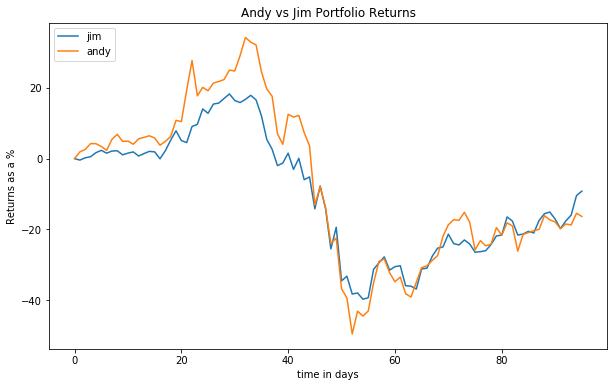

In [15]:
plt.figure(figsize = (10,6))
plt.title('Andy vs Jim Portfolio Returns')
plt.ylabel("Returns as a %")
plt.xlabel('time in days')

plt.plot(stock_cum_returns['Jim_%_Returns'], label = 'jim')
plt.plot(stock_cum_returns['Andy_%_Returns'], label = 'andy')
plt.legend(loc='upper left')

plt.show()